# Kaggle dataset listing the annual cause of death numbers for multiple countries worldwide
[Link to dataset](https://www.kaggle.com/datasets/willianoliveiragibin/annual-cause-death-numbers)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset 
data = pd.read_csv('Annual cause death numbers new.csv')

In [3]:
def create_profile(dataset,disease_list): #groups for diseases and sorts them
    dict = {}
    for disease in disease_list:
        dict[dataset[disease].sum()] = disease
    dict_keys = list(dict.keys())
    dict_keys.sort(reverse=True)
    diseases_sorted = []
    for key in dict_keys:
        diseases_sorted.append(dict[key])
    return diseases_sorted, dict_keys 

def get_bars_red(diseases_sorted, top_5, barplot_obj):
    bars_top_5 = []
    for top in top_5:
            for idx in range(len(diseases_sorted)):
                if top == diseases_sorted[idx]:
                    bars_top_5.append(idx)
            for bar in bars_top_5:
                barplot_obj.patches[bar].set_facecolor('red')
    return barplot_obj

def create_barplot(numbers, diseases_sorted, top_5, multiple=False):
    if multiple == False:
        sum_disease_df = pd.DataFrame({'numbers':numbers,'diseases':diseases_sorted})
        plt.figure(figsize=(16,10))
        barplot_obj = sns.barplot(data = sum_disease_df, y='diseases', x='numbers')
        barplot_obj = get_bars_red(diseases_sorted, top_5, barplot_obj)
        plt.xlabel("number of deaths")
        return barplot_obj
    else:
        sum_disease_df = []
        fig, axs = plt.subplots(2,2,figsize=(16,10))
        for numbers_income, diseases_income in zip(numbers, diseases_sorted):
            sum_disease_df.append(pd.DataFrame({'numbers':numbers_income,'diseases':diseases_income}))
        barplot_obj_1 = sns.barplot(data = sum_disease_df[0], y='diseases', x='numbers', ax = axs[0,0])
        barplot_obj_1 = get_bars_red(diseases_sorted[0], top_5, barplot_obj_1)
        barplot_obj_2 = sns.barplot(data = sum_disease_df[1], y='diseases', x='numbers', ax = axs[0,1])
        barplot_obj_2 = get_bars_red(diseases_sorted[1], top_5, barplot_obj_2)
        barplot_obj_3 = sns.barplot(data = sum_disease_df[2], y='diseases', x='numbers', ax = axs[1,0])
        barplot_obj_3 = get_bars_red(diseases_sorted[2], top_5, barplot_obj_3)
        barplot_obj_4 = sns.barplot(data = sum_disease_df[3], y='diseases', x='numbers', ax = axs[1,1])
        barplot_obj_4 = get_bars_red(diseases_sorted[3], top_5, barplot_obj_4)
        barplot_obj_1.set_xlim([0,200000000])
        barplot_obj_2.set_xlim([0,200000000])
        barplot_obj_3.set_xlim([0,200000000])
        barplot_obj_4.set_xlim([0,200000000])
        return barplot_obj_1, barplot_obj_2, barplot_obj_3, barplot_obj_4 

def create_line_plot(datasets, disease, labels):
    line_plots = []
    for set_, lab in zip(datasets, labels):
        line_plots.append(sns.lineplot(data=set_,x='Year',y=disease, label=lab))
    return line_plots
                  
def calculate_percentage(numbers, disease_sorted, top_5): 
    total = sum(numbers)
    for top in top_5:
        for idx in range(len(disease_sorted)):
            if disease_sorted[idx] == top:
                print(f"{top}: {round((numbers[idx]/total)*100,2)}%")
    print("\n")

### **1. Preprocess dataset**

In [4]:
data_cols = list(data.columns)
strip_cols = [col.strip() for col in data_cols if col.endswith('\n\n\n\n\n\n')]
strip_cols = ['Entity', 'Code', 'Year'] + strip_cols + ['Acute hepatitis fatalities', 'Measles fatalities']
data.columns = strip_cols

# set global seaborn color palette
custom_color = sns.color_palette("colorblind",32)
sns.set_palette(custom_color)

#create list of diseases
to_remove = ['Entity', 'Code', 'Year']
disease_list = strip_cols
for remove in to_remove:
    disease_list.remove(remove)

### **2. Create subset for world and calculate the sum of deaths over all years for each fatality**

In [5]:
data_world = data[data['Entity'] == 'World']
diseases_sorted_world, numbers_world = create_profile(data_world, disease_list)

get the top five fatality causes to compare between countries

In [6]:
#get top five causes worldwide
top_5_diseases = diseases_sorted_world[:5]

### **3. Display the summed worldwide fatalities of each category - from 1990 to 2020**

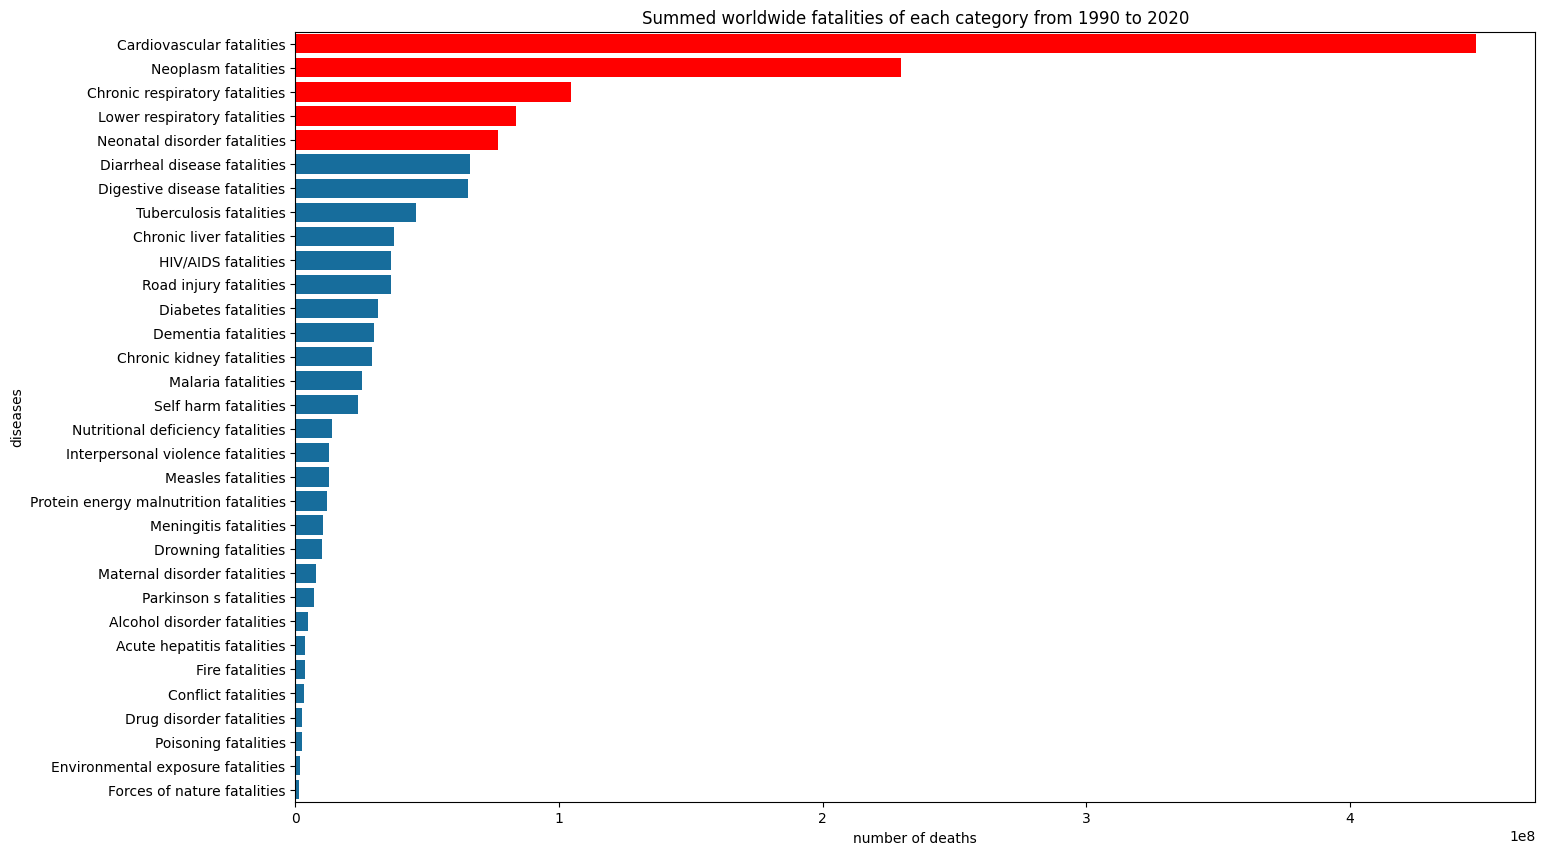

In [7]:
barplot_world = create_barplot(numbers_world, diseases_sorted_world, top_5_diseases)
plt.title('Summed worldwide fatalities of each category from 1990 to 2020')
plt.show()

#### **Proportion of all causes for top 5:**

In [7]:
calculate_percentage(numbers_world, diseases_sorted_world, top_5_diseases)

Cardiovascular fatalities: 30.23%
Neoplasm fatalities: 15.51%
Chronic respiratory fatalities: 7.06%
Lower respiratory fatalities: 5.66%
Neonatal disorder fatalities: 5.19%




## **Key point:**
## -> Cancer, respiratory and cardiovascular diseases are the top 4 causes of death worldwide. Neonatal fatalities are on fifth place.
## -> However, it is unclear to what extent the data is biased. Perhaps countries with better data collection are over-represented.

### **4. Plot worldwide fatalities over time - annually from 1990 to 2020**

<Figure size 640x480 with 0 Axes>

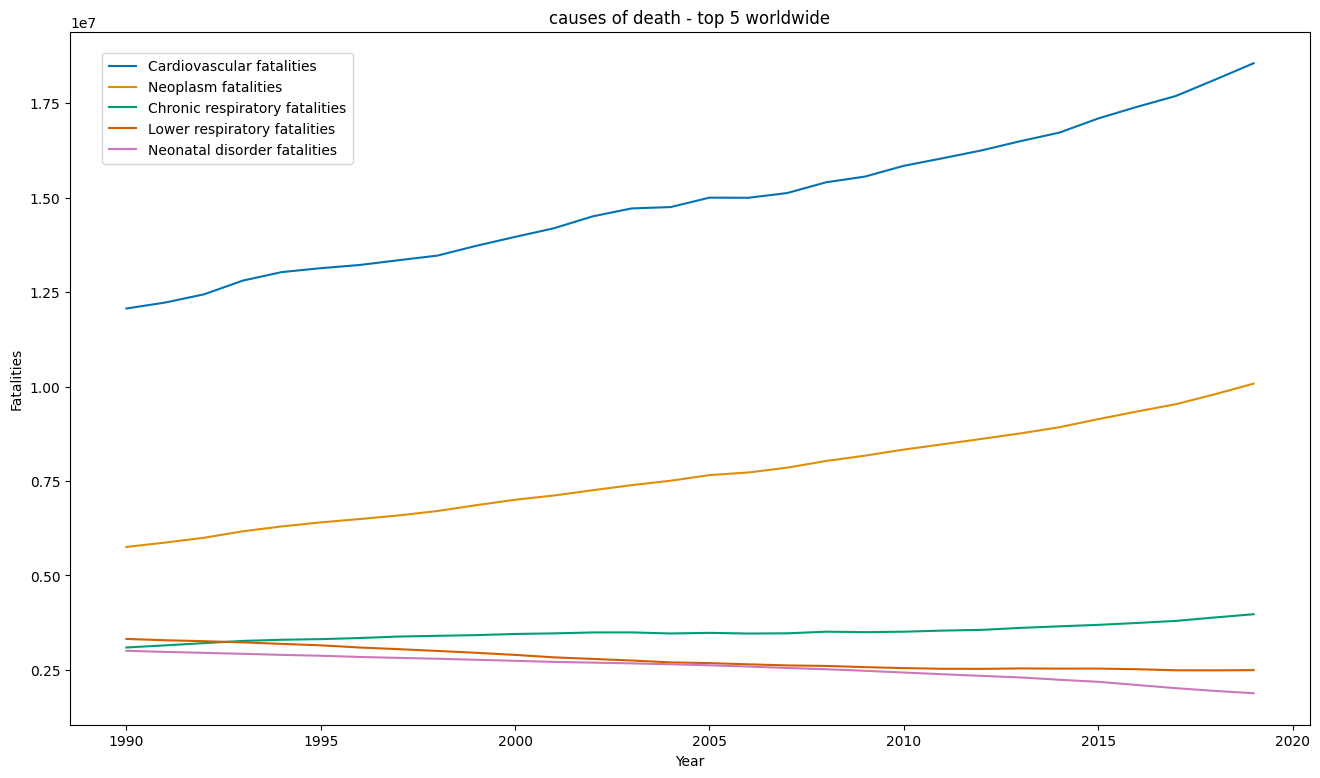

In [8]:
plt.clf()
plt.figure(figsize=(16,9))
line_list_world = []
for disease in top_5_diseases:
    line_list_world.append(sns.lineplot(data=data_world, x='Year',y=disease, label=disease))

plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderpad=0.5)
plt.ylabel('Fatalities')
plt.title("causes of death - top 5 worldwide")
plt.show()

## **Key point:**
## -> Respiratory and neonatal fatality rates remain constant
## -> Cardiovascular and neoplasm fatality rates increase over time 

# **Question:**
## **-> Does the fatality distribution vary across countries with different income levels?**
##### - The World Bank Group assigns the world's economies to four income groups – low, lower-middle, upper-middle, and high. 
##### - The classifications are updated each year on July 1, based on the GNI per capita of the previous calendar year.

In [9]:
data_high = data[data['Entity'] == 'World Bank High Income']
data_upper_middle = data[data['Entity'] == 'World Bank Upper Middle Income']
data_lower_middle = data[data['Entity'] == 'World Bank Lower Middle Income']
data_low = data[data['Entity'] == 'World Bank Low Income']
diseases_sorted_income = []
numbers_income = []

In [10]:
diseases_sorted, numbers = create_profile(data_high, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
diseases_sorted, numbers = create_profile(data_upper_middle, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
diseases_sorted, numbers = create_profile(data_lower_middle, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
diseases_sorted, numbers= create_profile(data_low, disease_list)
diseases_sorted_income.append(diseases_sorted)
numbers_income.append(numbers)
plt.clf()

<Figure size 640x480 with 0 Axes>

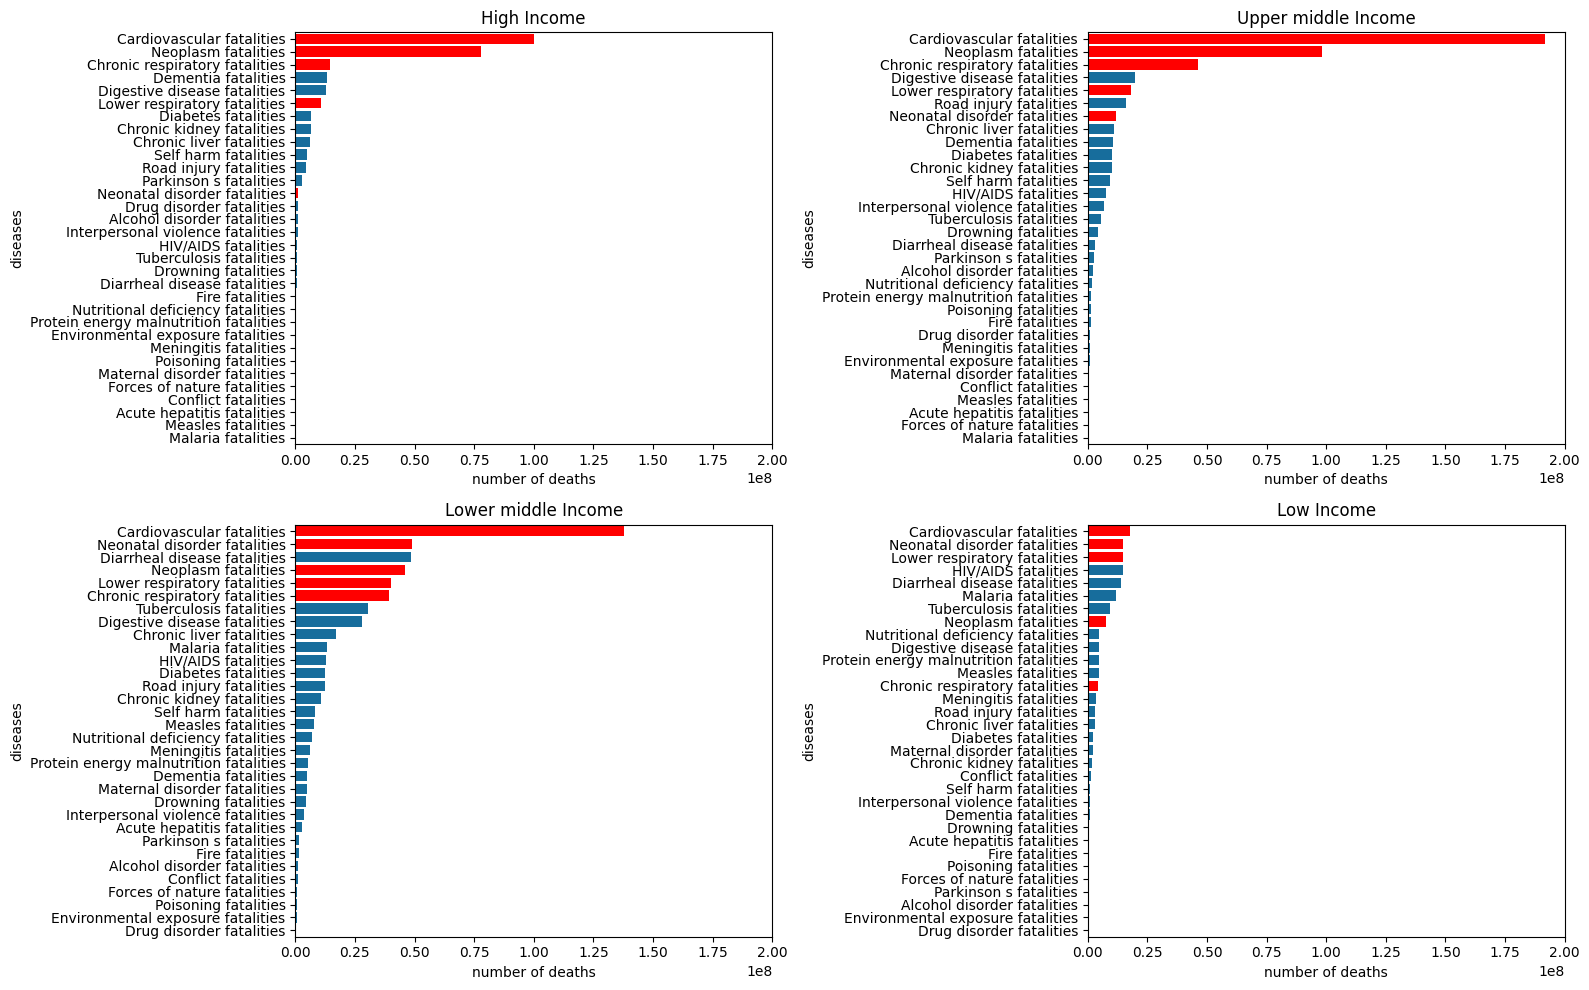

In [11]:
barplots_income = create_barplot(numbers_income, diseases_sorted_income, top_5_diseases, multiple=True)
barplots_income[0].set_title("High Income")
barplots_income[1].set_title("Upper middle Income")
barplots_income[2].set_title("Lower middle Income")
barplots_income[3].set_title("Low Income")
for idx in range(len(barplots_income)):
    barplots_income[idx].set_xlabel("number of deaths")
plt.tight_layout()
plt.show()

In [12]:
print(f"High Income Countries:")
calculate_percentage(numbers_income[0], diseases_sorted_income[0], top_5_diseases)
print(f"Upper middle Income Countries:")
calculate_percentage(numbers_income[1], diseases_sorted_income[1], top_5_diseases)
print(f"Lower middle Income Countries:")
calculate_percentage(numbers_income[2], diseases_sorted_income[2], top_5_diseases)
print(f"Low Income Countries:")
calculate_percentage(numbers_income[3], diseases_sorted_income[3], top_5_diseases)

High Income Countries:
Cardiovascular fatalities: 37.02%
Neoplasm fatalities: 28.73%
Chronic respiratory fatalities: 5.44%
Lower respiratory fatalities: 3.98%
Neonatal disorder fatalities: 0.44%


Upper middle Income Countries:
Cardiovascular fatalities: 38.57%
Neoplasm fatalities: 19.74%
Chronic respiratory fatalities: 9.25%
Lower respiratory fatalities: 3.67%
Neonatal disorder fatalities: 2.38%


Lower middle Income Countries:
Cardiovascular fatalities: 24.55%
Neoplasm fatalities: 8.19%
Chronic respiratory fatalities: 7.02%
Lower respiratory fatalities: 7.11%
Neonatal disorder fatalities: 8.72%


Low Income Countries:
Cardiovascular fatalities: 11.76%
Neoplasm fatalities: 5.19%
Chronic respiratory fatalities: 2.9%
Lower respiratory fatalities: 9.82%
Neonatal disorder fatalities: 9.85%




## **Answer:**
##  **Key point:** Yes, while cardiovascular diseases are the dominant cause for fatalities across all levels of income, the neonatal fatalities are strongly varying. From 0.44% in high income countries, up to 9.85% in low income countries. That is 1 infant death for every 10 deaths.
#### Notice, that neonatal fatalities are the second most common causes of death in lower middle and low income countries. 

In [13]:
datasets = [data_high,data_upper_middle,data_lower_middle,data_low]
labels = ['High Income', 'Upper middle Income', 'Lower middle Income', 'Low Income']
plt.clf()

<Figure size 640x480 with 0 Axes>

## **Question:**
## **-> How are neonatal disorder fatalities changing over time?**

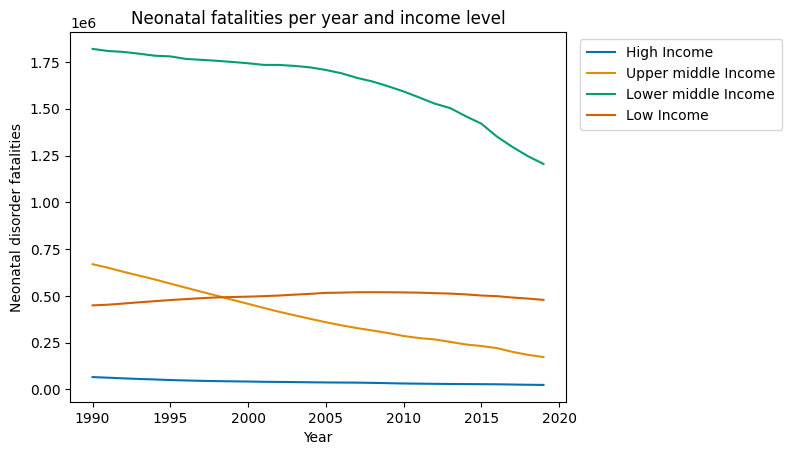

In [14]:
line_plots = create_line_plot(datasets, 'Neonatal disorder fatalities', labels)
plt.title("Neonatal fatalities per year and income level")
plt.legend(bbox_to_anchor=(1.45, 1), loc='upper right', borderpad=0.5)
plt.show()

## **Answer:**
## **Key point:** Neonatal fatality has been decreasing across all Income level, except for Low Income countries

### **Final Question:** 
### **What is the country with the highest summed neonatal disorder fatality?**

In [15]:
countries = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'GuineaBissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesiacountry', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'North Korea', 'North Macedonia', 'Northern Ireland', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Scotland', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Wales', 'Yemen', 'Zambia', 'Zimbabwe']
sum = 0
neo_dict = {}
for country in countries:
    neo_country = data[data['Entity'] == country]
    for disease in disease_list:
        sum += neo_country[disease].sum()
    percentage = (neo_country['Neonatal disorder fatalities'].sum()/sum)*100
    neo_dict[percentage] = country
    sum = 0
list_neo_keys = list(neo_dict.keys())
list_neo_keys.sort()
print(f"{neo_dict[list_neo_keys[-1]]} with {round(list_neo_keys[-1],2)}%")

Pakistan with 19.71%


### **Answer:** 
### **The country with the highest summed neonatal fatality proportion is Pakistan with a summed proportion of neonatal disorder fatalities of 19.71%**

In [16]:
data_pak = data[data['Entity'] == 'Pakistan']

### -> How did it change over time?

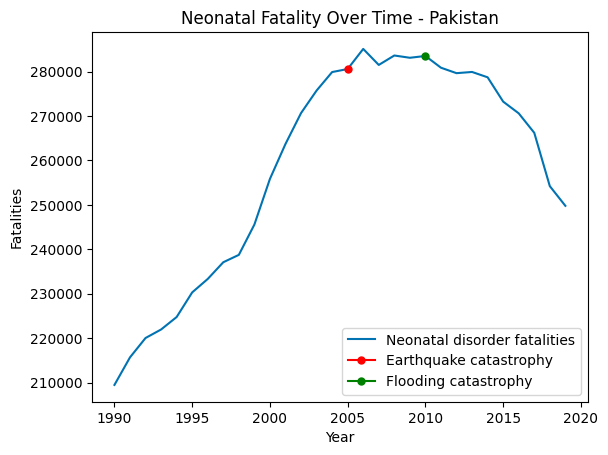

In [17]:
line_obj = (sns.lineplot(data=data_pak, x='Year',y='Neonatal disorder fatalities', label='Neonatal disorder fatalities'))
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderpad=0.5)
plt.ylabel('Fatalities')
y_earthquake = data_pak[data_pak['Year'] == 2005]['Neonatal disorder fatalities']
y_flood = data_pak[data_pak['Year'] == 2010]['Neonatal disorder fatalities']
plt.plot(2005, y_earthquake, marker = 'o', color = 'red', markersize = 5, label = 'Earthquake catastrophy')
plt.plot(2010, y_flood, marker = 'o', color = 'green', markersize = 5, label = 'Flooding catastrophy')
plt.title("Neonatal Fatality Over Time - Pakistan")
plt.legend()
plt.show()

### It peaked around 2005 to 2010 and is currently decreasing again.

# **Conclusions:**
## - Most people worldwide died from cardiovascular diseases. 
## - Despite globalisation and advances in modern medicine, neonatal disorder fatalities are still among the top 5 causes for death worldwide.
## - The proportion of neonatal disorder fatalities increases with decreasing levels of income, measured in GNI per capita.
## - The highest summed neonatal fatality proportion over the time from 1990 to 2020 is Pakistan

## **-->Modern medicine is a privilege of highly developed countries. Although modern medicine is able to prevent most infant deaths, access to it appears to be limited by the availability of economic resources. Lower economic resources may result in a higher proportion of neonatal deaths.**